C:\Users\dhruv\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


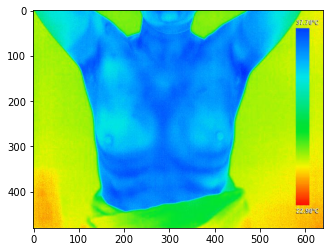

Image Dimension    :  (480, 640, 3)
Image Height       :  480
Image Width        :  640
Number of Channels :  3


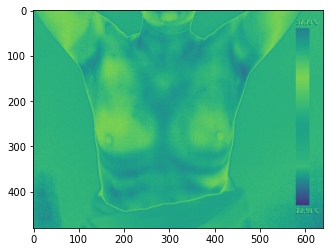

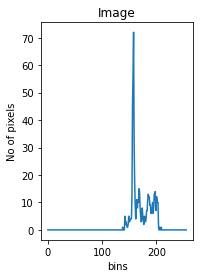

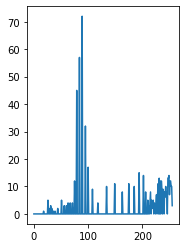

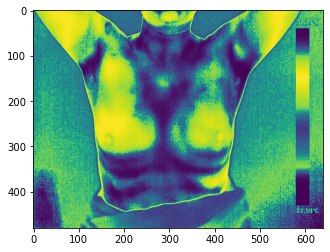

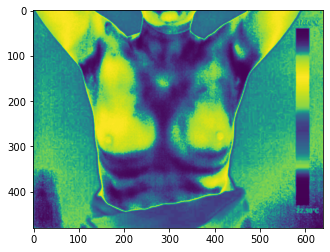

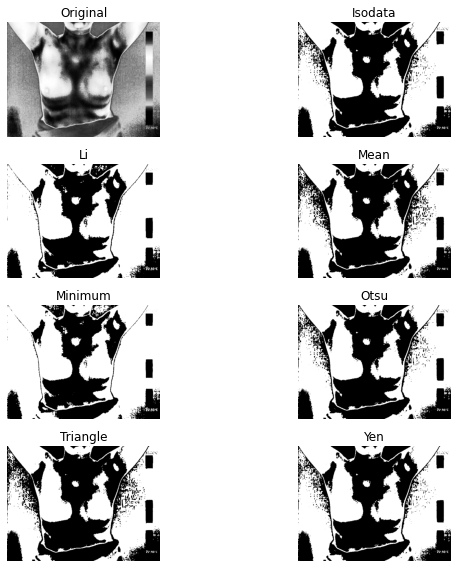

<ipython-input-1-8f940755cfb2>:103: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  thresholded=skimage.color.rgb2gray(binary)


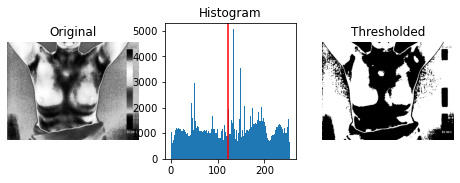

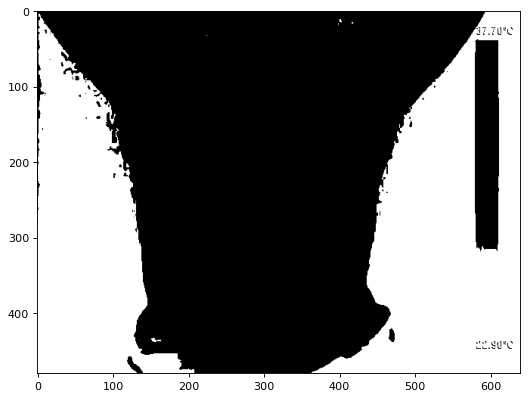

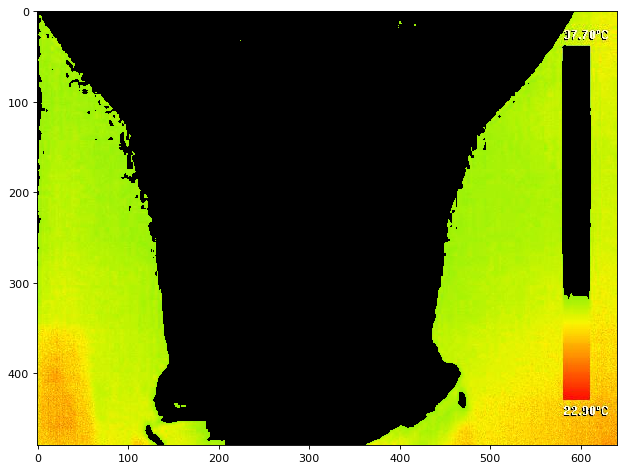

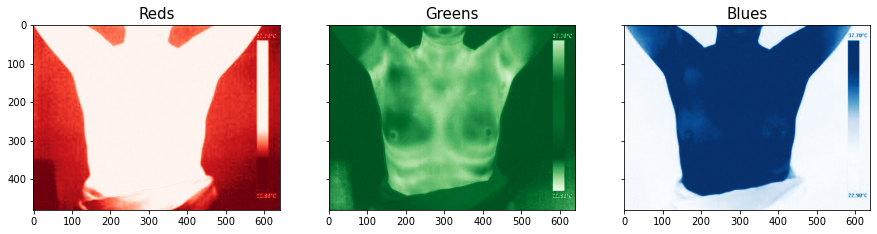

Bandwidth=  10.938315746755457
shape of labels : 51030
(24, 3)
number of estimated clusters : 24


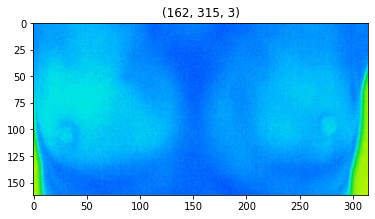

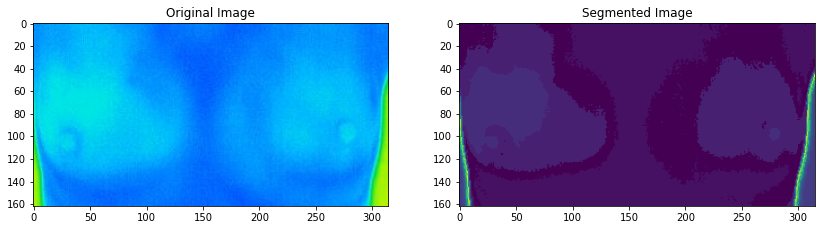

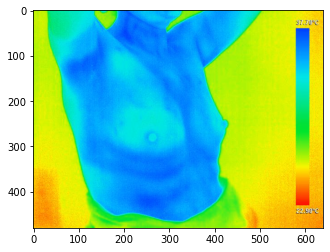

Image Dimension    :  (480, 640, 3)
Image Height       :  480
Image Width        :  640
Number of Channels :  3


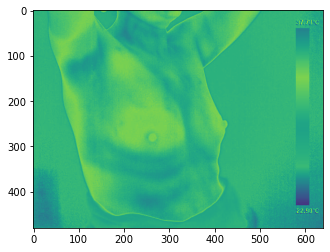

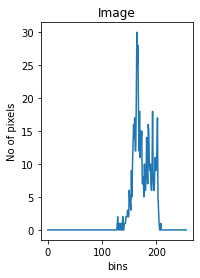

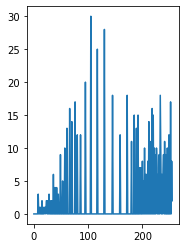

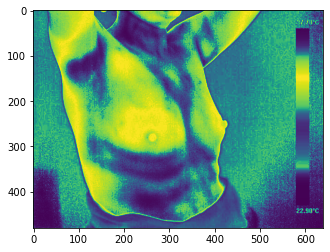

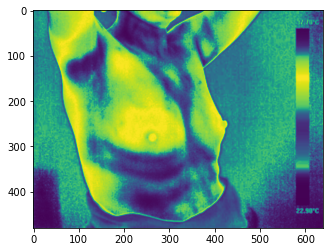

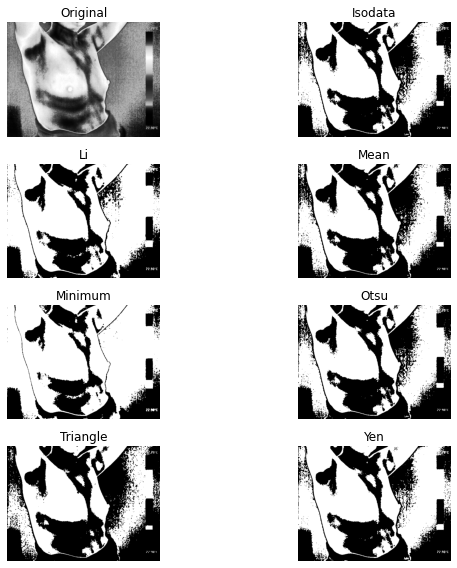

<ipython-input-1-8f940755cfb2>:103: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  thresholded=skimage.color.rgb2gray(binary)


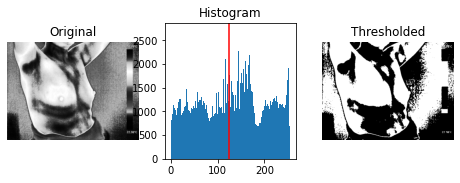

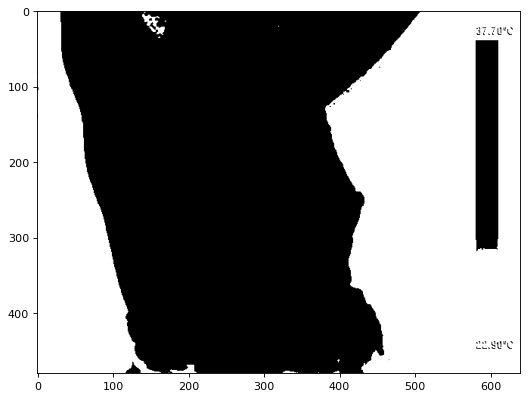

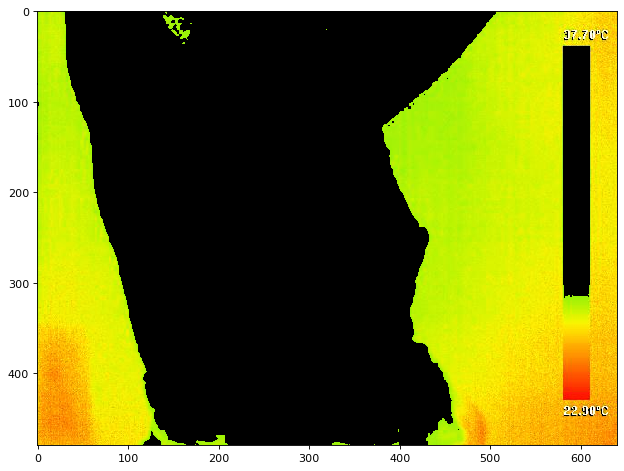

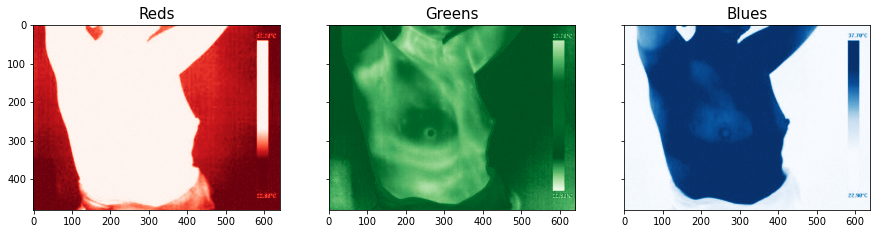

Bandwidth=  13.572234988643393
shape of labels : 48895
(17, 3)
number of estimated clusters : 17


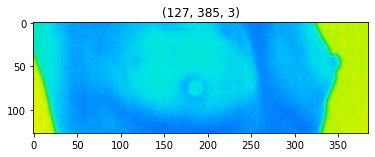

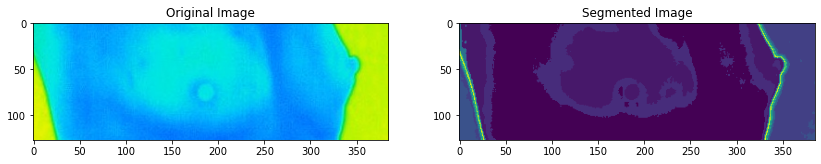

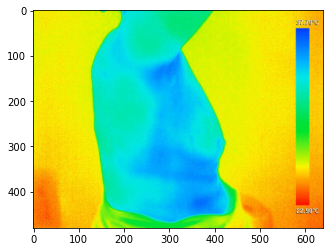

Image Dimension    :  (480, 640, 3)
Image Height       :  480
Image Width        :  640
Number of Channels :  3


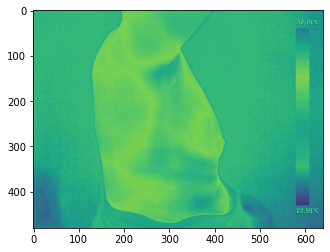

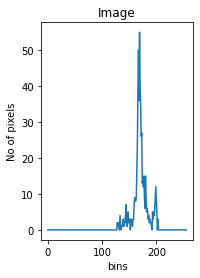

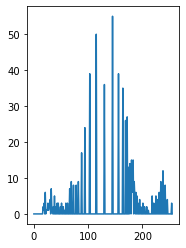

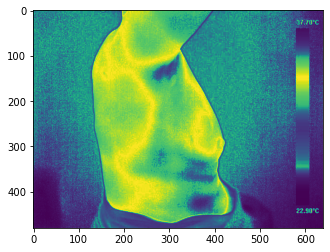

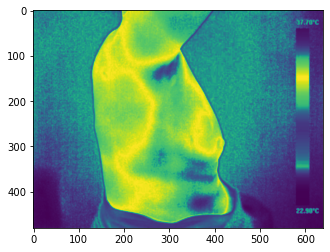

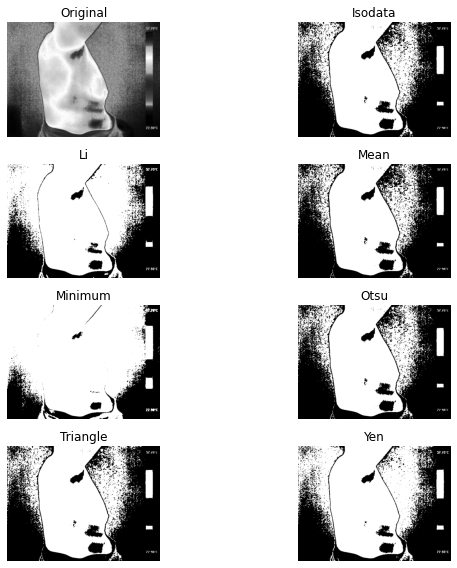

<ipython-input-1-8f940755cfb2>:103: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  thresholded=skimage.color.rgb2gray(binary)


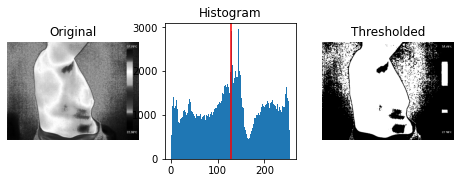

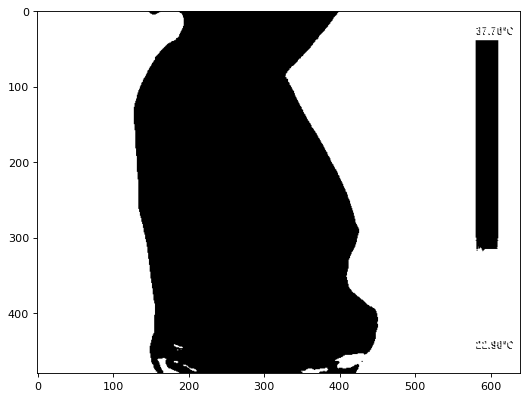

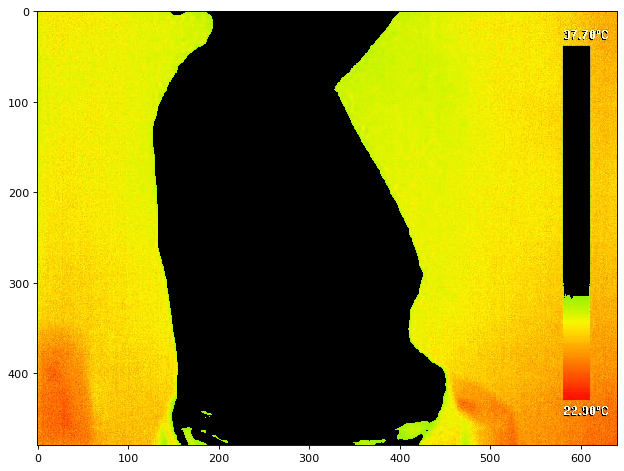

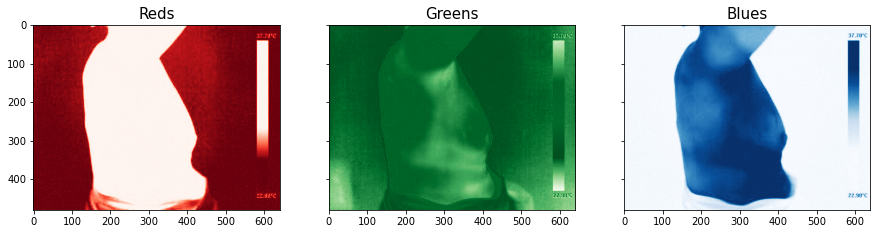

Bandwidth=  33.77248588619998
shape of labels : 48356
(5, 3)
number of estimated clusters : 5


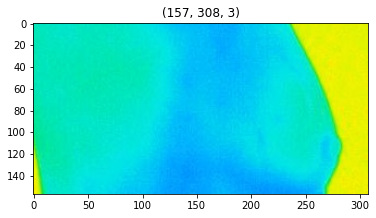

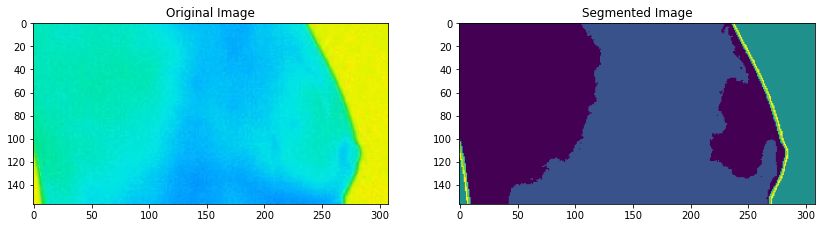

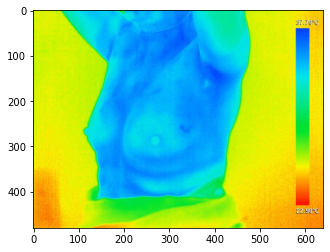

Image Dimension    :  (480, 640, 3)
Image Height       :  480
Image Width        :  640
Number of Channels :  3


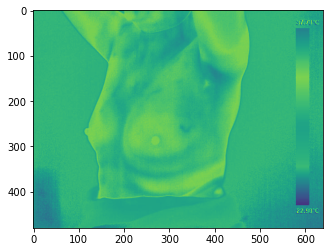

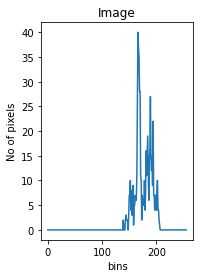

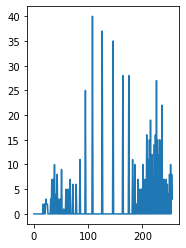

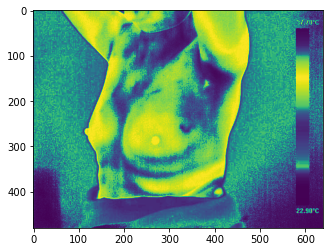

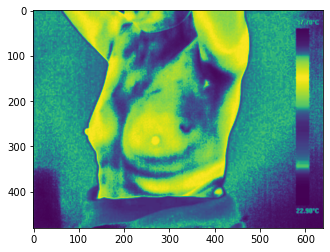

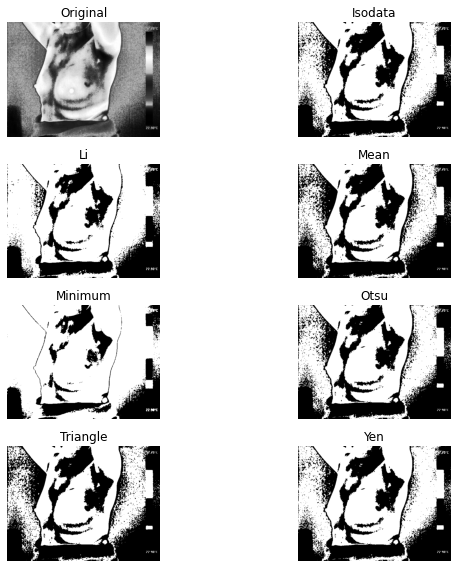

<ipython-input-1-8f940755cfb2>:103: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  thresholded=skimage.color.rgb2gray(binary)


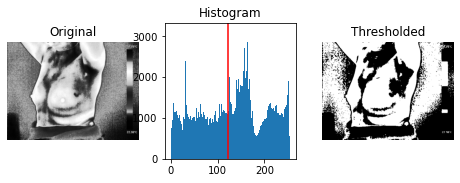

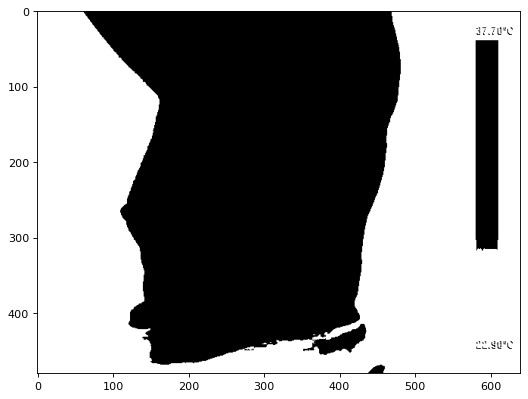

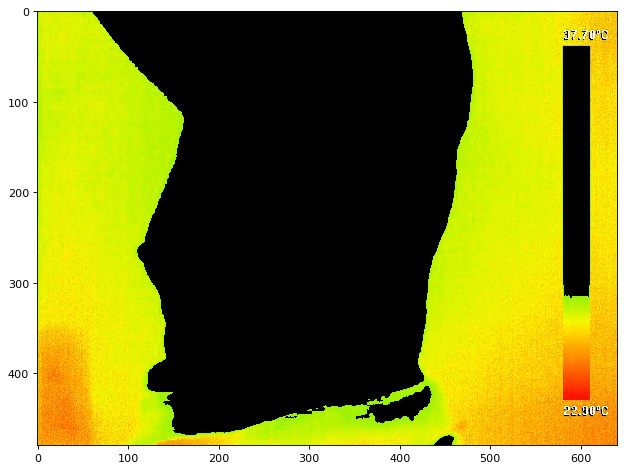

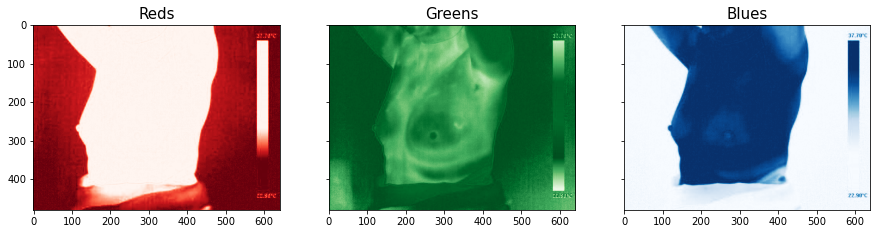

Bandwidth=  14.67682378830084
shape of labels : 65234
(13, 3)
number of estimated clusters : 13


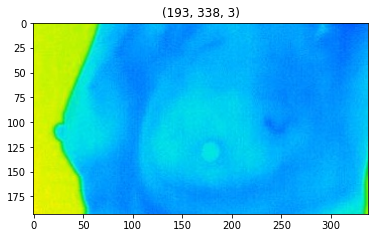

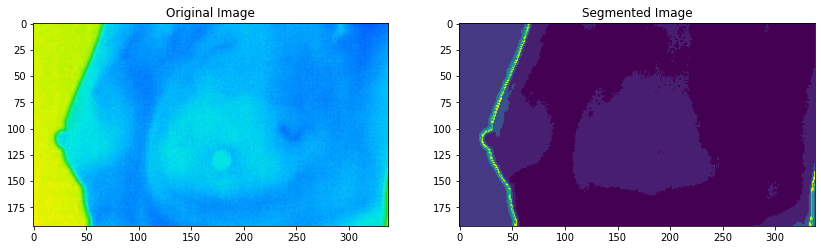

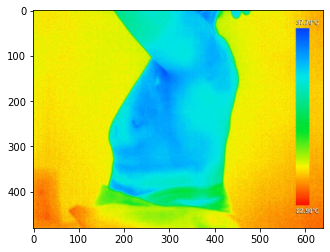

Image Dimension    :  (480, 640, 3)
Image Height       :  480
Image Width        :  640
Number of Channels :  3


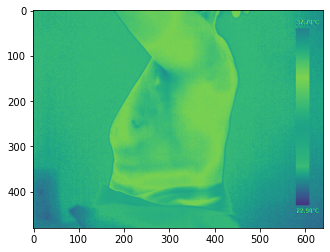

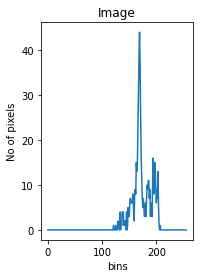

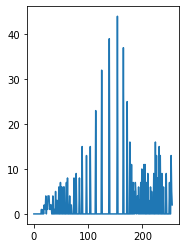

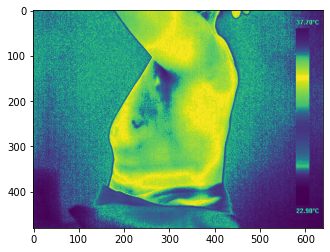

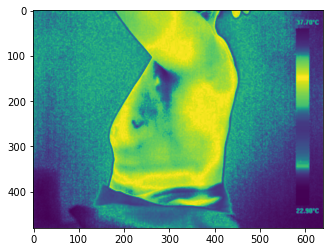

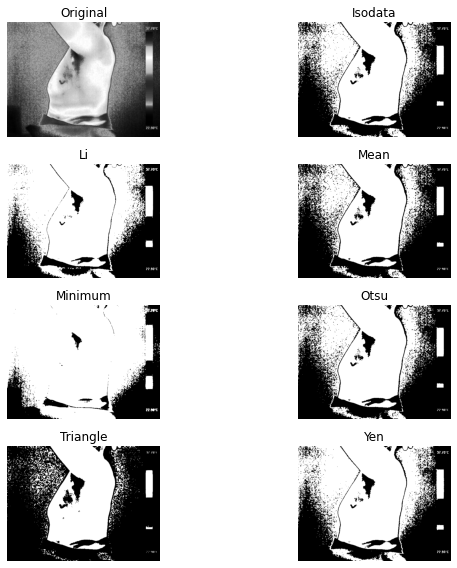

<ipython-input-1-8f940755cfb2>:103: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  thresholded=skimage.color.rgb2gray(binary)


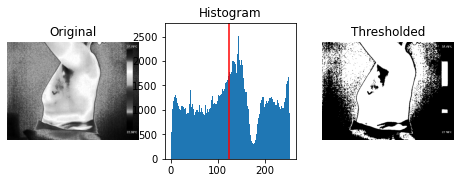

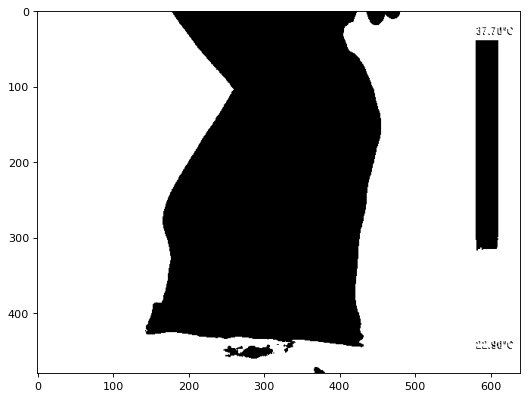

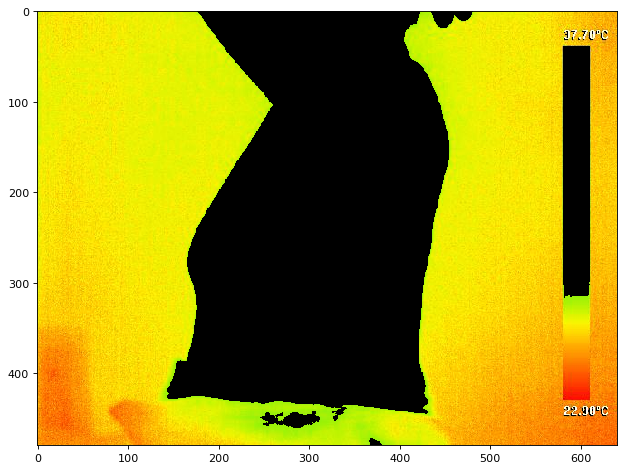

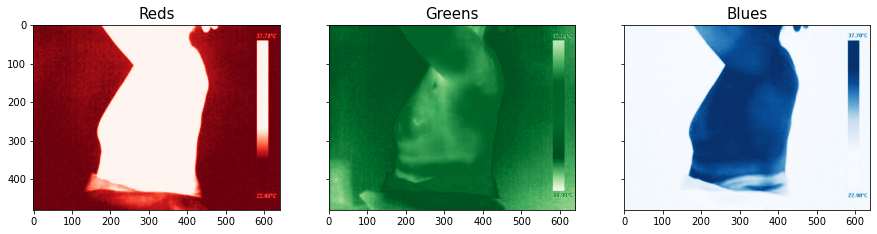

Bandwidth=  10.268975016972924
shape of labels : 47580
(34, 3)
number of estimated clusters : 34


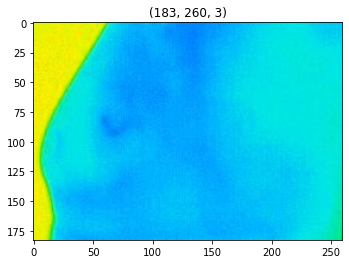

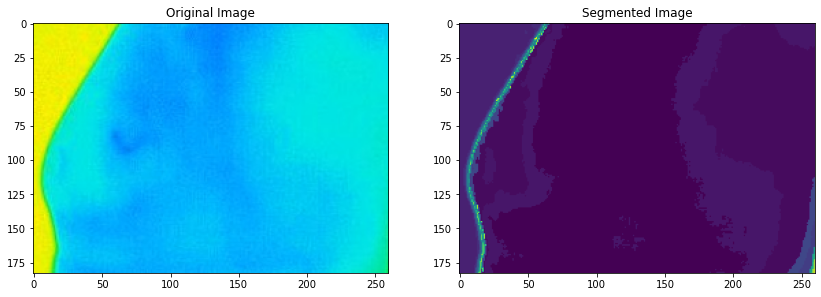

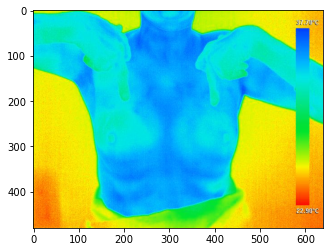

Image Dimension    :  (480, 640, 3)
Image Height       :  480
Image Width        :  640
Number of Channels :  3


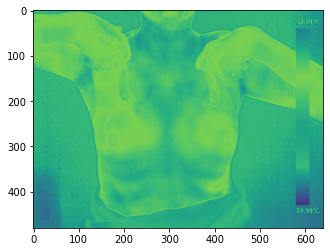

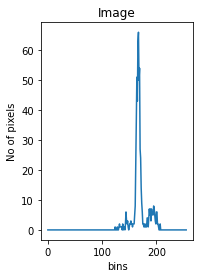

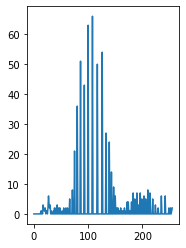

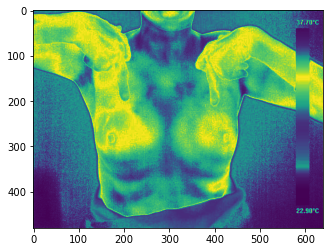

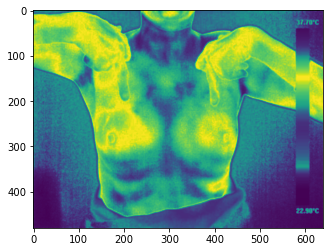

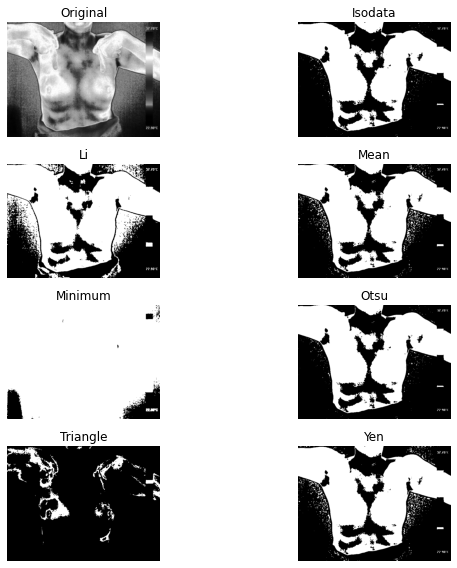

<ipython-input-1-8f940755cfb2>:103: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  thresholded=skimage.color.rgb2gray(binary)


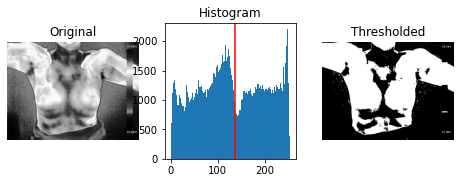

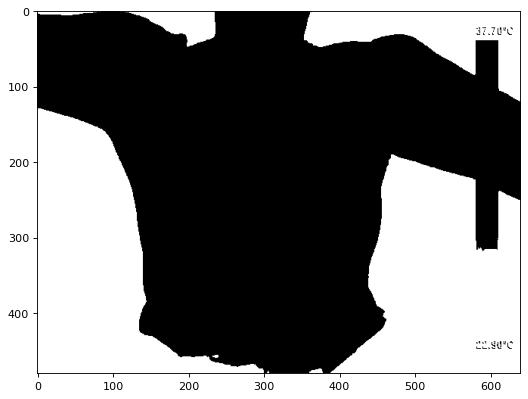

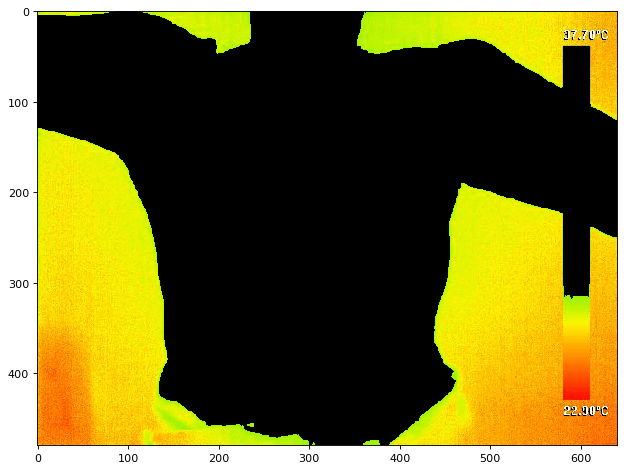

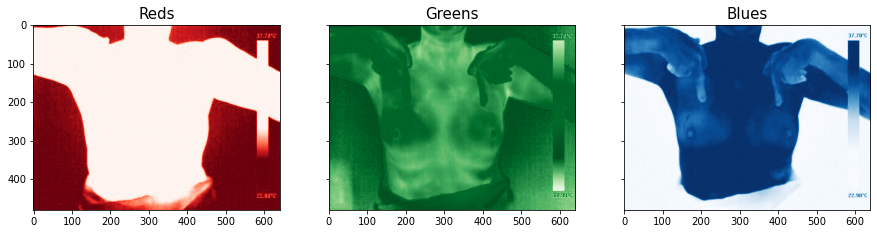

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import pickle
import skimage.color
from skimage.filters import threshold_otsu
from skimage.filters import try_all_threshold
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs
from itertools import cycle
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import pixellib
from skimage.io import imshow, imread
%matplotlib inline

DATADIR = "C:\Projects"
CATEGORIES = ["Abnormal","Normal"]
segimgno=1
crop_number=1
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)  # path to Normal or Abnormal dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))   #read the og image
        plt.imshow(img_array)
        plt.show()
        
        imgd=img_array.copy()
        imga=img_array.copy()
        dimensions = imgd.shape
 
        # height, width, number of channels in image
        height = imgd.shape[0]
        width = imgd.shape[1]
        channels = imgd.shape[2]
 
        print('Image Dimension    : ',dimensions)
        print('Image Height       : ',height)
        print('Image Width        : ',width)
        print('Number of Channels : ',channels)
        
        
        

        gray_img = cv2.cvtColor(imgd, cv2.COLOR_BGR2GRAY)  # convert thermal to grayscale
        plt.imshow(gray_img)
        plt.show()


        hist = cv2.calcHist(gray_img, [0], None, [256], [0, 256]) # no of pixels
        plt.subplot(121)
        plt.title("Image")
        plt.xlabel('bins')
        plt.ylabel("No of pixels")
        plt.plot(hist)
        plt.show()

        gray_img_eqhist = cv2.equalizeHist(gray_img)  # black/ white ratio
        hist = cv2.calcHist(gray_img_eqhist, [0], None, [256], [0, 256])
        plt.subplot(121)
        plt.plot(hist)
        plt.show()

        eqhist_images = gray_img_eqhist  #image enhancement 
        plt.imshow(eqhist_images)
        plt.show()
 

        sliding_window_size_x = 3  # noise removal using mean filter
        sliding_window_size_y = 3
        mean_filter_kernel = np.ones((sliding_window_size_x, sliding_window_size_y), np.float32) / (
                    sliding_window_size_x * sliding_window_size_y)
        filtered_image = cv2.filter2D(eqhist_images, -1, mean_filter_kernel)
        plt.imshow(filtered_image)
        plt.show()
        
        #Applying different types of thresholding on the images
        fig, ax = try_all_threshold(filtered_image, figsize=(10, 8), verbose=False)
        plt.show()
        #Applying otsu's thresholding
        image=filtered_image
        thresh = threshold_otsu(image)
        binary = image > thresh

        fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
        ax = axes.ravel()
        ax[0] = plt.subplot(1, 3, 1)
        ax[1] = plt.subplot(1, 3, 2)
        ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

        ax[0].imshow(image, cmap=plt.cm.gray)
        ax[0].set_title('Original')
        ax[0].axis('off')

        ax[1].hist(image.ravel(), bins=256)
        ax[1].set_title('Histogram')
        ax[1].axvline(thresh, color='r')
        
        thresholded=skimage.color.rgb2gray(binary)
        ax[2].imshow(thresholded, cmap=plt.cm.gray)
        ax[2].set_title('Thresholded')
        ax[2].axis('off')

        plt.show()
        # Band Separation
        red_filtered = (imgd[:, :, 0] > 150)
        plt.figure(num=None, figsize=(8, 6), dpi=80)
        plt.imshow(red_filtered, cmap='gray')
        plt.show()

        red_new = imgd.copy()
        red_new[:, :, 0] = red_new[:, :, 0] * red_filtered
        red_new[:, :, 1] = red_new[:, :, 1] * red_filtered
        red_new[:, :, 2] = red_new[:, :, 2] * red_filtered
        plt.figure(num=None, figsize=(8, 6), dpi=80)
        imshow(red_new)
        plt.show()


        def rgb_splitter(image):
            rgb_list = ['Reds', 'Greens', 'Blues']
            fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
            for i in range(3):
                ax[i].imshow(image[:, :, i], cmap=rgb_list[i])
                ax[i].set_title(rgb_list[i], fontsize=15)
            plt.show()


        rgb_splitter(imgd)
        img = np.array(imga)
        

        image = img_array.copy()
    
  
        # Select ROI
        r = cv2.selectROI("select the area", image)
  
        # Crop image
        cropped_image = image[int(r[1]):int(r[1]+r[3]), 
                      int(r[0]):int(r[0]+r[2])]
  
        # Display cropped image
        cv2.imshow("Cropped image", cropped_image)
        crop_img_path="C:\Cropped_Images"
        #save cropped image
        cv2.imwrite(crop_img_path +"\\"+"crop"+str(crop_number)+".jpeg",cropped_image)
        
        image = cv2.imread(crop_img_path +"\\"+"crop"+str(crop_number)+".jpeg")
        
        crop_number+=1
        
        img = np.array(image)
        # saving the image shape
        shape = img.shape

        # reshaping image 
        reshape_img = np.reshape(img, [-1, 3])
        
        #plotting the image
        plt.imshow(img)
        plt.title(img.shape)
        
        #bandwidth
        bandwidth = estimate_bandwidth(reshape_img, quantile=0.1, n_samples=100)
        print("Bandwidth= ", bandwidth)
       
       # Fitting the meanshift on reshape_img:

        msc = MeanShift(bandwidth=bandwidth, bin_seeding=True)
        msc.fit(reshape_img)
        
        print("shape of labels : %d" % msc.labels_.shape)
        print( msc.cluster_centers_.shape)
        print("number of estimated clusters : %d" % len(np.unique(msc.labels_)))
        labels = msc.labels_
        result_image = np.reshape(labels, shape[:2])
        
        #Let’s draw the images original and segmented.
        fig = plt.figure(2, figsize=(14, 12))
        ax = fig.add_subplot(121)
        ax = plt.imshow(img) 
        plt.title("Original Image")
        ax = fig.add_subplot(122)
        ax = plt.imshow(result_image)  
        plt.title("Segmented Image")
        plt.show()
        
        plt.imshow(result_image)
        #Saving mean shift image
        img_path="C:\Images"
       # plt.savefig(img_path +str(imgno)+ ".jpg")
        plt.savefig(img_path +"\\"+ str(segimgno)+".jpg")
        segimgno+=1
        
        
        cv2.waitKey(0)
    break
